# Eigenfaces
---






## 1. Objectifs du projet

Étudier les propriétés de la méthode de reconnaissance de visages par eigenfaces et son applicabilité pratique. 
Développer un système capable de reconnaître un visage à partir d'une base de données de visages de référence.




## 2. Principe général


Le problème de la reconnaissance de visages est défini comme suit : étant donnée une image de visage, on souhaite déterminer l'identité de la personne correspondante.

Pour ce faire, il est nécessaire d'avoir des images de référence, sous la forme d'une base de données de visages de toutes les personnes connues par le système. A chaque visage est associé un vecteur de caractéristiques. Ces caractéristiques sont supposées être invariantes pour une même personne, et différentes d'une personne à l'autre. La reconnaissance consiste alors à comparer le vecteur de caractéristiques du visage à reconnaître avec celui de chacun des visages de la base. Ceci permet de retrouver la personne ayant le visage le plus ressemblant, qui est celui dont le vecteur est le plus similaire.
Il existe plusieurs types de méthodes, qui se distinguent par le type de caractéristiques utilisées :
*  Les approches par modèles de visage procèdent à une analyse biométrique des visages pour déterminer des mesures telles que la distance entre les yeux, la longueur du nez, la forme du menton...
*  Les approches "image" comparent au contraire directement les visages, en les considérant comme des images, pour lesquelles des mesures de similarité pré-attentives (sans modèle a priori) sont définies.
*  Des approches hybrides utilisent les notions de similarité entre images, mais en rajoutant des connaissances a priori sur la structure d'un visage.




## 3. Analyse par eigenface


La reconnaissance de visages par eigenfaces est une approche de type "image". Chaque image de visage est considérée comme un vecteur dans un espace ayant autant de dimensions que de pixels dans l'image. Les caractéristiques de l'image sont extraites par une méthode mathématique de réduction de dimensionnalité basée sur l'analyse en composante principales (ACP).

Cette approche a été originellement proposée par Turk et Pentland en 1991.

Dans la suite, nous utiliserons la notation italique pour désigner les scalaires ($m, K$) ainsi que le gras pour  les vecteurs ($\bf I, J, u$) et  les matrices ($\bf A, W$).

On note ${\bf I}_k\;\; (k=1..m)$ l'image du visage de référence numéro $k$, et ${\bf I}_k(i)\;\; (i=1..n)$ le pixel numéro $i$ de cette image. Chaque visage peut donc être considéré comme un vecteur à $n$ dimensions : l'ensemble des visages forme un nuage de points dans un espace $\bf R^n$.

On note ${\bf \Psi}$ la moyenne de ce nuage de points, ou ''visage moyen''. Le principe de la méthode des eigenfaces est de modéliser la différence d'un visage quelconque par rapport à ce visage moyen par un ensemble limité d'images $u_h$, appelées eigenfaces. Une image de visage ${\bf J} \in {\bf R^n}$ est donc exprimée comme le visage moyen auquel s'ajoute une combinaison linéaire d'eigenfaces :
$$
{\bf J} = {\bf \Psi} +  \sum_h  w_h {\bf u_h} + {\mathbf \varepsilon}
$$
où $w_h$ représente le poids de l'eigenface d'indice $h$ dans le visage ${\bf J}$, et $\bf \varepsilon$ représente le vecteur d'erreur entre $\bf J$ et son approximation par les eigenfaces. Les coefficients $w_h$ jouent un rôle très important pour la reconnaissance des visages, car ils correspondent aux coordonnées du visage ${\bf J}$ dans le sous-espace des visages.

La méthodes des eigenfaces repose sur le fait que le nombre d'eigenfaces considérées est bien inférieur à la dimension totale de l'espace, ce que l'on appelle ''réduction de dimensionnalité''. Les images sont donc analysées dans un sous-espace de dimension réduite, qui représente plus spécifiquement les visages, parmi tous les types d'images possibles.

Le visage moyen étant toujours le même pour une base de référence fixée, nous considèrerons dans la suite systématiquement chaque visage sous sa forme centrée, c'est-à-dire après soustraction du visage moyen.

## 4. Installation des paquets Python
Pour ce projet nous allons utiliser essentiellement :
- `numpy`, pour tout ce qui est manipulation de matrices et de vecteurs
- `matplotlib`, pour les affichages des images, courbes, etc.
- `scikit-learn`, uniquement pour le chargement de la base de données
- `pandas`, pour la manipulation de la base de données d'images

Pour installer ces paquets Python plusieurs solutions sont possibles

### 4.1. Installation avec pip

```
$ pip install numpy matplotlib scikit-learn pandas
```

### 4.2. Installation avec mini-conda

```
$ conda create -n conda_eigenfaces
$ conda activate conda_eigenfaces
$ pip install numpy matplotlib scikit-learn pandas
```

### 4.2. Installation avec un environnement virtuel

```
$ python3 -m venv venv_eigenfaces
$ source venv_eigenfaces/bin/activate
$ pip install numpy matplotlib scikit-learn pandas
```

##  5. Mise en pratique


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#### Base de données de visages

Récupérez la base d'image "ATT faces".

> Color: Grey-scale
>
> Sample Size: 92x112
>
> Samples: 400
>
> Dataset Size: 4.5 MB (compressed in .tar.z)
>
> The size of each image is 92x112 pixels, with 256 grey levels per pixel. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10).
>
> The AT&T face dataset, “(formerly ‘The ORL Database of Faces’), contains a set of face images taken between April 1992 and April 1994 at the lab. The database was used in the context of a face recognition project carried out in collaboration with the Speech, Vision and Robotics Group of the Cambridge University Engineering Department.
>
> There are 10 different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). A preview image of the Database of Faces is available.
>
>![ATT Faces](data/faces.gif)

En pratique, la base de données peut être récupérée via scikit-learn.

In [2]:
# Chargement de la base de données via scikit-learn
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()


La matrice ```face.images```est de taille $m \times n$.

```face.image[i]``` contient la ieme image de la base de données

>d'autres datasets peuvent etre utilisés comme
>> ```    sklearn.datasets.fetch_lfw_people() ```
>mais il est bcp plus gros ~200MB

Nous pouvons séparer la base de référence de 400 visages en un ensemble d'apprentissage et en un ensemble de test.

scikit-learn est là pour nous aider...

In [3]:
# Séparation via scikit-learn du jeu de données d'images en deux ensembles : train et test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,faces.target, random_state=0)


Dans la suite, nous manipulerons toujours les images de visage sous la
forme de vecteurs, et un ensemble de visages sous la forme d'une
matrice dont chaque colonne est un visage. Les images seront stockées
dans des matrices de réels (double).

En particulier, les images de la base seront stockées dans une matrice
$\bf I$ de taille $n \times m$ ($n$ étant le nombre de pixels dans les images et $m$ le nombre d'images) : 
$$ \bf I = [ I_1 ... I_m ] $$

Par rapport à la structure rendue par scikit-learn, il est donc nécessaire de transposer nos données. Nous allons créer 3 ensembles :
* ```I_ref``` qui contriendra l'ensemble des visages (400 images)
* ```I_train``` qui servira à l'apprentissage (300 images)
* ```I_test```qui servira aux tests (100 images)

Noter que les images font 4096 pixels soit $64 \times 64$. Les intensités de chaque pixel sont normalisées et $\in [0,1]$

In [5]:
# Transposition des images au format vertical
I_ref = faces.data.transpose()
I = X_train.transpose()
I_test = X_test.transpose()

Text(0.5, 0.98, '15 first faces of the training set')

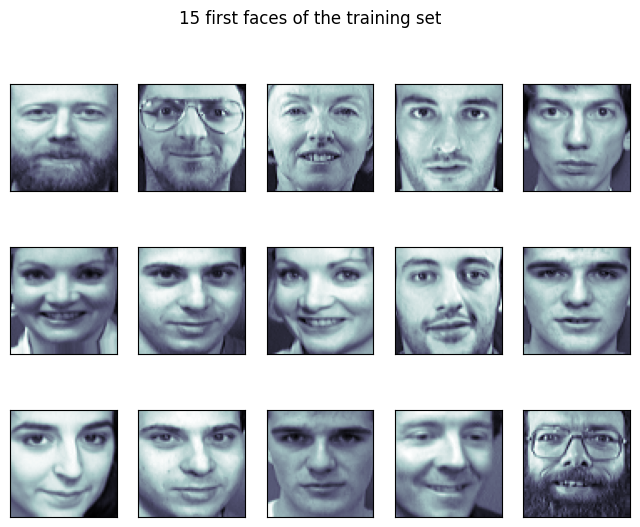

In [6]:
fig= plt.figure(figsize=(8, 6))

# Affichage des 15 premieres images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # each image is in the column of matrix I
    # so I[:,i] is the vector corresponding to the ith image
    # the .reshape(faces.images[0].shape) is necessary to transform the vector I[:,i] into an image of the same
    # as the original ones, ie a (64,64) shape.
    ax.imshow(I[:,i].reshape(faces.images[0].shape), cmap=plt.cm.bone)

fig.suptitle('15 first faces of the training set')

#### Question 1

Calculez le visage moyen $\Psi$

In [ ]:
# Calcul du visage moyen
mean = # insert code here

mean

Réalisez l'affichage du visage moyen.

In [ ]:
# Affichage du visage moyen
# insert code here


## 6. Analyse en Composantes Principales

La méthode développée par Turk et Pentland définit les eigenfaces comme les axes principaux obtenus en effectuant l'Analyse en Composantes Principales des vecteurs associés aux visages de référence.

Les eigenfaces sont ainsi les vecteurs propres de la matrice de covariance ${\bf A A}^T$, de taille $n \times n$, où la matrice   ${\bf A}$ de même taille que $\bf I$ représente l'ensemble des visages centrés :
$${\bf  A} = [\bf I_1-{\bf \Psi}  \ldots  I_m-{\bf \Psi} ] $$
Chaque ligne de ${\bf A}$ correspond à un pixel $p$, chaque colonne de ${\bf A}$ correspond à un visage de référence centré de numéro $k$.

#### Question 2

Calculer la matrice A

In [ ]:
#  number of images in the training set
m = # insert code here
print('number of images m=',m)
n = # insert code here
print('number of pixels in each image n=',n)

#compute the matrix A
# insert code here


#### Question 3

Afficher les 15 premiers visages centrés de la base d'apprentissage.


In [ ]:
# On affiche les 15 premières images centrées de la base d'apprentissage.

# insert code here

>***Remarque***
>
>Plutôt que d'utiliser la décomposition en valeurs propres, nous utiliserons la décomposition en valeurs singulières (SVD, ou singular value decomposition).
>
>La SVD décompose la matrice ${\bf A}$ de taille $n\times m$ en :
>$$
\bf A=U.S.V^T
>$$>
>où ${\bf U}$ et ${\bf V}$ sont des matrices orthonormales ( $\bf U.U^T=U^T.U=I_n$  et  $\bf V.V^T=V^T.V=I_m$ de tailles respectives $ n\times n$ et $m\times m$, et $\bf S$ est une matrice $n\times m$ nulle partout sauf sur la diagonale principale.
>
>Cette décomposition présente les propriétés suivantes : 
>* les colonnes de  ${\bf V}$ sont les vecteurs propres de ${\bf A^T.A}$,
>* les colonnes de ${\bf U}$ sont les vecteurs propres de ${\bf A.A^T}$,
>* les carrés des valeurs singulières $s_k$ de ${\bf S}$ sont les valeurs singulières $\sigma_k$ de ${\bf A^T.A}$ et ${\bf A.A^T}$.
>
> Finalement les valeurs singulières $\sigma$ sont les racines carrés des valeurs propres $\lambda$. On a donc $\lambda = \sigma^2$


#### Question 4

Que represente la matrice $\bf U$

*insert answer here*

#### Question 5

Calculer la matrice des eigenfaces.

La SVD peut etre calculée en utilisant numpy ```np.linealg.svd(...)```

In [ ]:
# Calcul de la matrice des eigenfaces (visages de références).
# insert code here

print("U = ",U.shape)
print("VT = ",VT.shape)
print("S = ",S.shape)


Afficher le vecteur des valeurs singulières

In [ ]:
# Affichage du vecteur des valeurs singulières
# insert code here

**Que constatez vous ? Que pouvez vous en déduire de l'importance de chaque eigenfaces ?**


*insert answer here*

#### Question 6

Afficher les 30 premières eigenfaces ainsi que les valeur propres associées

In [ ]:
# Affichage des 30 premières eigenfaces ainsi que les valeurs propres associées.

# Replace ??? by the correct values

fig = plt.figure(figsize=(16, 6))
for i in range(30):
    dx = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    dx.set_title(f"$\lambda${i} = {????:.2f}")   # Attention au carré de la valeur singulière
    dx.imshow(????.reshape(faces.images[0].shape), cmap=plt.cm.bone)


fig.suptitle('30 eigenfaces ')

## 7. Projection dans le sous-espace des visages et reconstruction

>Dans la suite, nous utiliserons un nombre réduit d'eigenfaces afin de modéliser l'espace de visages représenté sous la forme de la base $\bf U'_K$ des $K$ premiers vecteurs propres :
>$$
\bf U'_K =\bf  [ u_1... u_K ]
>$$
>Notez que les colonnes forment un ensemble orthogonal, donc $\bf U'^T.U'=I_K$.


La projection d'une image dans le sous-espace des visages se fait simplement en soustrayant le visage moyen et en effectuant le produit scalaire de l'image obtenue avec chaque eigenface. Ceci donne les coordonnées de l'image test dans le sous-espace des visages, qui est de dimension $K$.

Chaque visage possède donc plusieurs représentations :
*  Son image d'origine, représentée par un vecteur ${\bf J}$ général dans $\bf R^n$
*  Son image projetée dans le sous-espace des visages : $\bf J_p$
*  Les coordonnées de l'image projetée dans la base des eigenfaces : $W_k$

Compte tenu des propriétés d'une base orthonormée, le vecteur ${\bf W_k}$ s'obtient par simple produit scalaire entre l'image centrée et chacune des eigenfaces (on parle de projection sur un sous-espace):
$$
W_k = {\bf u}_k^T . (\bf J - {\bf \Psi})
$$
Il permet de calculer (**reconstruire**) l'image projetée :
$$
{\bf J_p} = {\bf \Psi} + \sum_{k=1}^{K} W_k {\bf u}_k
$$


Cette image projetée est aussi appelée ***image reconstruite***, pour mettre en avant qu'elle est issue de la recomposition d'une image à partir du visage moyen et des eigenfaces.

L'erreur de reconstruction (ou de projection) est définie comme la distance entre une image et l'image reconstruite (projetée) associée :
$$
E({\bf J}) = \parallel \bf J-J_p \parallel
$$


#### Question 7

Calculez les coordonnées d'un visage dans le sous-espace des visages pour $K=60$ en utilisant la méthode ``np.matmul``.
On utilisera la première image de la base de test ``I_test```.

In [ ]:
# On ne garde que les K=60 premiers vecteurs propres

# insert code here

print('Uk',UK.shape)

# Calcul des coordonnées d'un visage dans le sous-espace des visages (première image)

# insert code here

print('WK',WK.shape)
print('Wk : ',WK)


#### Question 8
Calculez l'image reconstruite correspondante, pour plusieurs valeurs de $K$.
Afficher le visage reconstruit à coté du visage original.

In [ ]:
# now Let do the reconstruction
Jp = # insert code here


fig= plt.figure(figsize=(4,2))
ax = plt.subplot(1,2,1,xticks=[], yticks=[])
ax.set_title('Visage reconstruit')
ax.imshow(Jp.reshape(faces.images[0].shape), cmap=plt.cm.bone)
ax = plt.subplot(1,2,2,xticks=[], yticks=[])
ax.set_title('Visage original')
ax.imshow(J.reshape(faces.images[0].shape), cmap=plt.cm.bone)

#### Question 9

Faites la même chose pour les 7 premières images de la base ```I_test``` et les 3 premières de la base ```I_train``` pour $K=m$, $K=150$ et $K=30$.

Pour chaque image reconstruite, vous calculerez l'erreur de reconstruction $
E({\bf J}) = \parallel \bf J-J_p \parallel
$

Y a-t-il une différence entre les visages de l'apprentissage et les visages de test ? Pourquoi ?

>Remarque : Attention à ajouter/soustraire l'image moyenne correctement dans les calculs et pour l'affichage.


In [ ]:
# Replace ??? by the correct values

# Let's do that for various faces and various K
fig= plt.figure(figsize=(16,6))

for i in range(10):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    # Let's take the first image in the test set
    if (i<7):
        J = ????
        ax.set_title('test')
    else:
        ax.set_title('-- train --')
        J=???

    if (i==0):
        ax.set_ylabel("original")
    ax.imshow(J.reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

    K = m
    UK = ???

    # projection in the subspace? WK is the vector that the K coefficient
    # (this is nothing bu a scalar product)
    WK = ???
    # now Let do the reconstruction
    Jp = ???
    ax = fig.add_subplot(4, 10, i + 1+10, xticks=[], yticks=[]) #2eme ligne
    if (i==0):
        ax.set_ylabel(K)
    error = ???
    ax.set_xlabel(f"E(J)={error:.2f}")
    ax.imshow(Jp.reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    K = 150
    UK = ???
    WK = ???
    Jp = ???
    ax = fig.add_subplot(4, 10, i + 1+20, xticks=[], yticks=[]) #3eme ligne
    if (i==0):
        ax.set_ylabel(K)
    error = ???
    ax.set_xlabel(f"E(J)={error:.5f}")
    ax.imshow(Jp.reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    K=30
    UK = ???
    WK = ???
    Jp = ???
    ax = fig.add_subplot(4, 10, i + 1+30, xticks=[], yticks=[]) #4eme ligne
    if (i==0):
        ax.set_ylabel(K)
    error = ???
    ax.set_xlabel(f"E(J)={error:.2f}")
    ax.imshow(Jp.reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

fig.suptitle('Reconstructed faces for K= 300, 150, 30')


#### Question 10

Que constatez vous quand on utilise les images de la base d'apprentissage pour $K=m$ ?
Expliquez ?


*insert answer here*

#### Question 11

Normalisez les valeurs propres afin que leur somme soit égale à 100%, puis tracez la courbe de leur somme cumulée, afin de voir combien de variation est capturée par les $K$ premières eigenfaces.

Combien d'eigenfaces sont nécessaires pour obtenir une "bonne"  reconstruction ?

In [ ]:


# insert code here
eigenvaluenormalized=# insert code here
eigenvaluenormcumul=# insert code here

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
x = 0.5+np.arange(m)
ax.bar(x,eigenvaluenormalized,width=1,label="eigenvalues")
ax.plot(x,eigenvaluenormcumul,linewidth=2,color='red',label="cumulative eigenvalues")
ax.plot([20,20],[0,1],color='green')
ax.plot([50,50],[0,1],color='green')
ax.set_xlabel("number of considered eigenvalues")
ax.legend(loc='center right', borderaxespad=0.)


*insert answer here*

#### Question 12

Tracez l'évolution de la moyenne de l'erreur de reconstruction des visages de test lorsque K varie de 1 à $m$.
Cette évolution est-elle cohérente avec la somme cumulée ?

In [ ]:
# Compute the reconstruction error when K varies from 1 to m

# insert code here

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
x = np.arange(m)
ax.plot(x,error,color='red',label="reconstruction error")
ax.set_xlabel("number of considered eigenvalues")
ax.legend(loc='center right', borderaxespad=0.)


*insert answer here*

## 8. Identification


A chaque visage de référence $\bf I^k$ on associera une identité, sous la forme d'un numéro $id(k)$. Nous chercherons dans cette partie à identifier un visage test à partir des visages de référence.

La méthode la plus simple consiste à comparer la projection $\bf J_p$ du visage test $\bf J$ avec la projection $\bf J_p^k$ de chaque image de référence $\bf I^k$. La dissimilitude entre les deux est quantifiée par la distance dans le sous-espace $E_k(J)$ :
$$
E({\bf J}) = \parallel \bf J-J^k_p \parallel
$$

En évaluant cette distance pour chaque visage de référence, on peut déterminer le visage de référence $\bf I^k$ le plus proche du visage test $\bf  J$. On appelle alors erreur d'identification la distance correspondante dans le sous-espace. Si l'erreur d'identification est inférieure à un seuil $\theta$, on peut estimer qu'il s'agit d'un visage reconnu d'identité, sinon le visage est classifié comme inconnu.

Etant donné un corpus de visages de référence et de visages de test, le taux d'identification est défini comme le ratio entre le nombre de visages correctement identifiés et le nombre de visages testés. Il vaut 1 lorsque tous les visages testés sont correctement identifiés.


#### Question 13

Pour l'instant on prend $K=30$. Calculez pour chaque visage du jeu de référence sa distance dans le sous-espace par rapport à l'ensemble des visages de référence. On pourra par exemple visualiser le résultat sous la forme d'une image de matrice. Que constate-t-on ?

In [ ]:
# Remarque : l'exécution peut prendre un peu de temps.

errormatrix = np.zeros((400,400))
decision = np.zeros((400,400))
K=30
UK = U[:,0:K]
UKt = UK.transpose()

nimage = 400
# insert code here

max = errormatrix.max()
errormatrix = errormatrix/max

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
cax = ax.matshow(errormatrix,cmap='inferno')
fig.colorbar(cax)


#### Question 14

Quelles sont les distances min et max entre deux visages de la même classe (même personne) ? entre deux visages de classes différentes ?
Quelles conclusions peut-on en tirer concernant $\theta$

In [ ]:
nperson = 40
nimageforoneperson = 10
nbintra = 0  # nombre de decisions correctes intra classe
nbinter = 0  # nombre de decisions incorrectes inter classe
ninter = 0   # nombre de comparaisons inter classe
nintra = 0   # nombre de comparaisons intra classe

seuil = 0.3
# insert code here

print(f"nombre de decision correctes intra classe = {nbintra}/{nintra} = {nbintra/nintra*100}%")
print(f"nombre de decision incorrectes inter classe = {nbinter}/{ninter}= {nbinter/ninter*100}%")

*insert answer here*

In [ ]:
# Il n'y a rien à faire dans cette cellule, elle sert à afficher.

#errormatrix = errormatrix/max
for i in range(nimage):
    for j in range(nimage):
        if (errormatrix[i][j]<seuil) :
            decision[i][j] = 1
        else:
            decision[i][j] = errormatrix[i][j]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1,1)
cax = ax.matshow(decision,cmap='inferno') #'viridis')
fig.colorbar(cax)